In [1]:
#Import necessary libraries
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


## Data Exploratory Anlalysis (EDA)

1. Data loading
2. Initial exploration
3. Data cleaning
4. Univariate data visualizations
5. Exploration of relationships
6. Multvariate data visualizations
7. Communication of findings

## Questions

1. How many medals has been given on each category?
2. Witch are the most popular sports in the olympic games?
3. How many men and women have participated in the olympic games?
4. Evolution of the number of sports by edition
5. Number of Olympic Games by city

# 1. Data loading:

In [2]:
data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# 2. Initial exploration:

In [3]:
data.shape
#With this instruction we can see the number of rows and columns in the DataFrame

(271116, 15)

In [4]:
data.info()
#Showing the columns names and his types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### As we can see there are some colums with different number of rows, so we have to manage this missing values.

In [5]:
data.describe()
#Showing some statistical values of the data

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# 3. Data cleaning:

### If we want to fill in the missing values ​​with the mean, we must first verify that the data follow a normal distribution.

In [6]:
#Importing Matplotlib and Seaborn to create the visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Age Distribution')

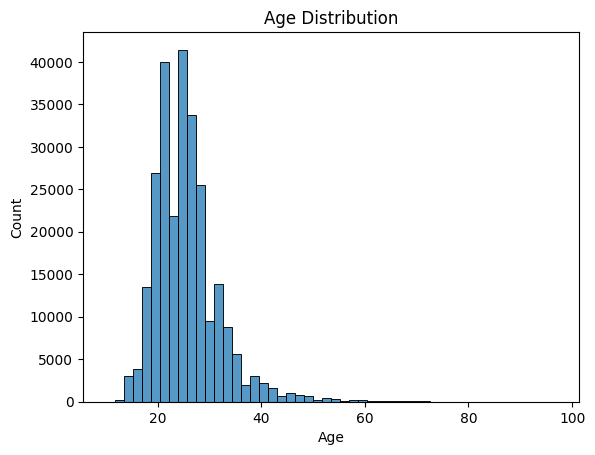

In [7]:
#Age distribution
age_dist = sns.histplot(data=data, x='Age', bins=50)
age_dist.set_title('Age Distribution')

Text(0.5, 1.0, 'Height Distribution')

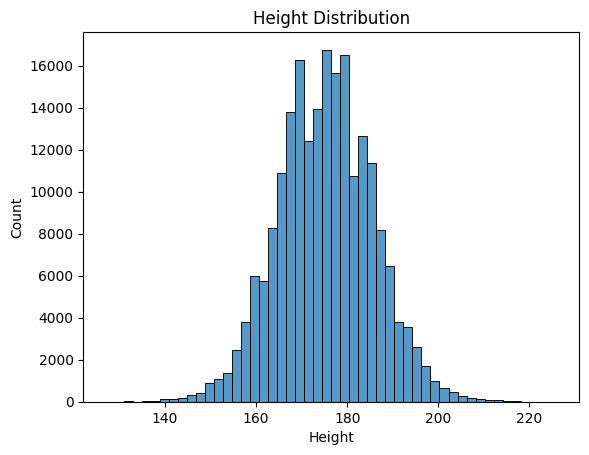

In [8]:
#Height distribution
height_dist = sns.histplot(data=data, x='Height', bins=50)
height_dist.set_title('Height Distribution')

Text(0.5, 1.0, 'Weight Distribution')

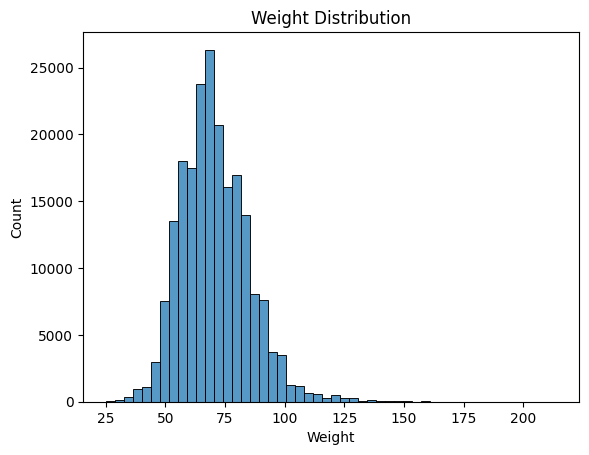

In [9]:
#Weight distribution
weight_dist = sns.histplot(data=data, x='Weight', bins=50)
weight_dist.set_title('Weight Distribution')

## The 'Age', 'Height' and 'Weight' colums are normal distributed so we can fill the missing values with the mean.

In [10]:
#Selecting only the numeric columns where the missing values are
numeric_columns = data.select_dtypes(include = ['number'])
numeric_columns

,ID,Age,Height,Weight,Year
0,1,24.0,180.0,80.0,1992
1,2,23.0,170.0,60.0,2012
2,3,24.0,NaN,NaN,1920
3,4,34.0,NaN,NaN,1900
4,5,21.0,185.0,82.0,1988
...,...,...,...,...,...
271111,135569,29.0,179.0,89.0,1976
271112,135570,27.0,176.0,59.0,2014
271113,135570,27.0,176.0,59.0,2014
271114,135571,30.0,185.0,96.0,1998


In [11]:
#Filling the missing values with the mean
for column in numeric_columns.columns:
    data[column] = data[column].fillna(data[column].mean())
    

In [12]:
data.info()
#Now we have the same number of rows in the columns 'Age', 'Height' and 'Weight'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
#Filling the missing values in the 'Medal' column witn the text 'No Medal'
data['Medal'] = data['Medal'].fillna(' No Medal')

In [14]:
data.info()
#All columns have the same number of rows now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [15]:
#All data cleaned
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


# 4. Univariate data visualizations:

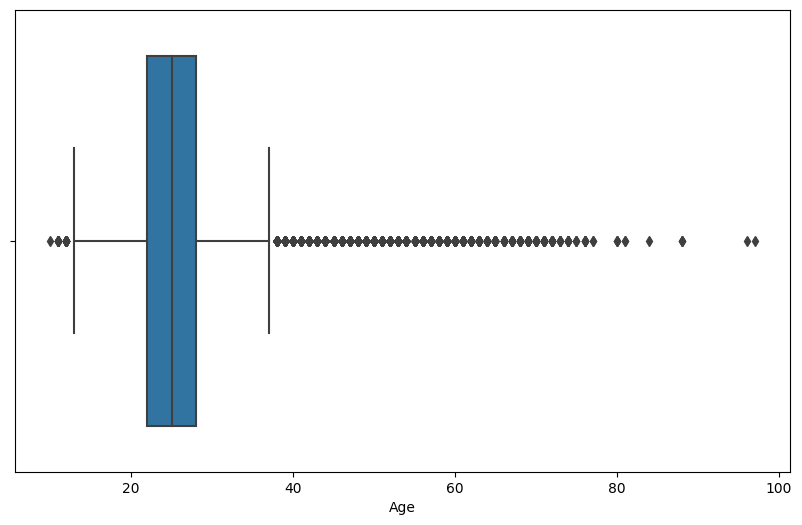

In [16]:
#We have already seen the age distribution with a histogram before, but with a box plot we can appreciate the outliers more precisely.
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.show()

In [17]:
#Showing the exact values represented in the box plot
data['Age'].describe()

count    271116.000000
mean         25.556898
std           6.280857
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [18]:
#Calculate Interquartile Range (IQR) to know Atypical Values
#q1 and q2 from describe() method
q1 = 22.0
q3 = 28.0
iqr = q3 - q1
top_limit_value = q3 + 1.5*iqr
low_limit_value = q1 - 1.5*iqr
f"Top limit value: {top_limit_value} Low limit value: {low_limit_value}"

'Top limit value: 37.0 Low limit value: 13.0'

In [19]:
#Count how many athletes are older than the top_limit_value by sport
older_athletes = data[data['Age'] > top_limit_value]
older_athletes['Sport'].value_counts().head(25)

Sport
Shooting                3178
Art Competitions        2226
Equestrianism           1997
Sailing                 1040
Fencing                 1031
Athletics                408
Archery                  311
Bobsleigh                230
Gymnastics               167
Rowing                   122
Cycling                   99
Curling                   98
Table Tennis              83
Cross Country Skiing      81
Biathlon                  78
Canoeing                  71
Tennis                    70
Ice Hockey                51
Wrestling                 46
Golf                      42
Weightlifting             42
Speed Skating             36
Polo                      33
Figure Skating            30
Handball                  29
Name: count, dtype: int64

### Looks like the sports with older atlethes are the ones in wich the fisical condition in not the most important skill, but experience is. 

In [20]:
#Count how many athletes are younger than the low_limit_value by sport
youger_athletes = data[data['Age'] < low_limit_value]
youger_athletes['Sport'].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

### On the other hand, for younger athletes, swimming and figure skating stand out, where it seems that they benefit from their flexibility, resistance and recovery capacity compared to older athletes.
### Notice that the number of outliers for older atlethes are too much greater than for the younger ones.

In [21]:
#Selecting only the text columns for a further analysis
text_columns = data.select_dtypes(include=['object'])
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [22]:
#Showing some interesting data by column
for column in text_columns.columns:
    if column != 'Name' and column != 'NOC': #I am not interested in this two columns for the analysis
        print(data[column].value_counts().head())
        print()


Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

Medal
 No Medal    231333
Gold          13372
Bronze        13295
Silver        13116
Name: co

### As we can see Summer Olympic Games are much more popular than Winter Olympic Games.
### The United States is the country with the most participating athletes in history, followed by France and Great Britain.

In [23]:
# Percentage of athletes who win a medal
total_medal_given = 13372 + 13295 + 13116
total_athletes = 231333

medal_percentage = round((total_medal_given / total_athletes * 100),2)
medal_percentage

17.2

### Only 17,2% of the athletes win a medal.

### The differences in Gold, Silver and Bronze medals given can be explained by two facts:
#### 1. There have been more ties for the top positions and more gold medals than silver and bronze medals have been awarded in some competitions.
#### 2. We do not have all the data for all the medals awarded.

# Answers to questions 1, 2 and 3:

### 1. How many medals has been given on each category?
#### Throughout all editions of the Olympic Games, 13,372 gold, 13,295 silver and 13,116 bronze medals have been awarded.


### 2. Witch are the most popular sports in the olympic games?
#### The most popular sport in the Olympic Games, if we understand this as the one that most athletes practice in this sporting event, is athletics, followed by gymnastics and swimming.


### 3. How many men and women have participated in the olympic games?
#### 196,594 men and 74,522 women have participated in the Olympic Games throughout history. 
#### This wide difference is explained by the fact that although women have participated since the 1900 Paris Olympic Games, there was no female category for all sports until London 2012.

# 5. Exploration of relationships:

### By grouping the data we can discover different interesting relationships.

In [24]:
#Grouping 'Age', 'Height' and 'Weight' data by 'Year' and 'Season'
data.groupby(['Year','Season'])[['Age', 'Height', 'Weight']].agg(['min', 'max', 'mean'])

Age                  Height                    Weight         \
              min   max       mean    min    max        mean    min    max   
Year Season                                                                  
1896 Summer  10.0  40.0  24.428354  154.0  188.0  175.024252   45.0  106.0   
1900 Summer  13.0  71.0  27.615160  153.0  191.0  175.416800   51.0  102.0   
1904 Summer  14.0  71.0  26.457794  155.0  195.0  175.412605   43.0  115.0   
1906 Summer  13.0  54.0  26.452842  165.0  196.0  175.764177   52.0  114.0   
1908 Summer  14.0  61.0  26.674436  157.0  201.0  175.676599   51.0  115.0   
1912 Summer  13.0  67.0  27.462098  157.0  200.0  175.715357   49.0  125.0   
1920 Summer  13.0  72.0  28.555820  142.0  197.0  175.412831   48.0  146.0   
1924 Summer  13.0  81.0  27.849653  142.0  200.0  175.322156   44.0  146.0   
     Winter  11.0  58.0  27.338572  152.0  191.0  174.734256   45.0  109.0   
1928 Summer  11.0  97.0  28.740219  147.0  202.0  175.337740   41.0  125.0   
     Winter  15.0  54.0  26.422888  155.0  211.0  175.053138   45.0  103.0   
1932 Summer  13.0  96.0  32.635220  147.0  200.0  175.007635   41.0  110.0   
     Winter  11.0  52.0  25.547752  152.0  193.0  174.278066   45.0   91.0   
1936 Summer  12.0  74.0  27.806255  147.0  205.0  175.464554   37.0  138.0   
     Winter  11.0  46.0  25.054889  152.0  189.0  174.938858   45.0  109.0   
1948 Summer  12.0  84.0  28.618998  140.0  213.0  175.546318   47.0  125.0   
     Winter  15.0  53.0  26.236491  157.0  193.0  175.010300   48.0   92.0   
1952 Summer  13.0  65.0  26.235340  150.0  213.0  175.054106   42.0  139.0   
     Winter  12.0  47.0  25.446691  157.0  196.0  175.090950   48.0  145.0   
1956 Summer  13.0  67.0  25.976668  148.0  218.0  174.780580   28.0  141.0   
     Winter  12.0  48.0  25.550055  137.0  199.0  174.574161   36.0  130.0   
1960 Summer  12.0  65.0  25.305533  146.0  218.0  173.405487   40.0  141.0   
     Winter  11.0  39.0  24.251304  137.0  191.0  173.111651   36.0   96.0   
1964 Summer  12.0  60.0  25.068027  137.0  218.0  173.749052   38.0  163.0   
     Winter  13.0  53.0  24.428144  152.0  193.0  172.871000   46.0  114.0   
1968 Summer  11.0  68.0  24.270160  127.0  216.0  174.101328   40.0  163.0   
     Winter  11.0  51.0  24.229287  142.0  200.0  173.352544   34.0  108.0   
1972 Summer  12.0  69.0  24.352076  130.0  223.0  174.762223   39.0  182.0   
     Winter  13.0  42.0  24.110375  143.0  201.0  173.480414   38.0  108.0   
1976 Summer  12.0  70.0  23.871870  136.0  220.0  175.065542   30.0  163.0   
     Winter  12.0  46.0  23.750202  142.0  200.0  174.444162   40.0  100.0   
1980 Summer  13.0  70.0  23.752271  131.0  220.0  175.624943   25.0  190.0   
     Winter  13.0  49.0  23.657249  150.0  200.0  175.062630   38.0  104.0   
1984 Summer  12.0  60.0  24.036510  132.0  218.0  175.563047   31.0  150.0   
     Winter  15.0  53.0  23.454136  148.0  200.0  175.385969   40.0  112.0   
1988 Summer  13.0  70.0  24.144723  127.0  223.0  175.674154   32.0  161.0   
     Winter  11.0  52.0  23.843209  145.0  200.0  175.925906   42.0  107.0   
1992 Summer  11.0  62.0  24.400011  136.0  223.0  176.179360   30.0  176.5   
     Winter  13.0  46.0  24.028393  145.0  200.0  175.384653   35.0  111.0   
1994 Winter  13.0  46.0  24.422821  148.0  200.0  175.179869   40.0  113.0   
1996 Summer  12.0  63.0  24.915418  136.0  223.0  175.819609   30.0  176.5   
1998 Winter  14.0  50.0  25.163416  142.0  200.0  174.599022   32.0  123.0   
2000 Summer  13.0  63.0  25.422513  136.0  226.0  176.083040   28.0  180.0   
2002 Winter  15.0  48.0  25.916281  149.0  201.0  174.706943   42.0  123.0   
2004 Summer  13.0  57.0  25.639515  139.0  226.0  175.971152   30.0  198.0   
2006 Winter  14.0  52.0  25.959151  147.0  206.0  174.624152   38.0  127.0   
2008 Summer  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0   
2010 Winter  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0   
2012 Summer  13.0  71.0  25.961378  

### As seen in the average Age, Height and Weight data, they have remained similar throughout all editions and regardless of whether they are summer or winter editions.

In [25]:
#Grouping the a'Age' data by 'Season' and 'Sex'
data.groupby(['Season', 'Sex'])[['Age']].agg(['min', 'max', 'mean'])

Age                 
             min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

### We can see that the maximum age for Winter Sports Athletes is significantly lower than for Summer Olympic Athletes, probably because the cold decreases performance more the older the athlete is.

In [26]:
#Grouping the 'Team', 'Sport' and 'Event' data by 'Season' and 'Sex' and counting the unique values 
data.groupby(['Season', 'Sex'])[['Team', 'Sport', 'Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

### The number of Teams and Events for men is much greater than for women. Not so the number of sports that are shared for both sexes.
### This is explained by the fact that women did not have access to the same number of competitions as men until London 2012 and not in all countries women practice the same number of sports as men, which significantly reduces the number of teams. that compete.

In [27]:
#Grouping de 'Age', 'Height' and 'Weight' data by 'Medal', 'Season' and 'Sex' showing average
data.groupby(['Medal', 'Season', 'Sex'])[['Age', 'Height', 'Weight']].mean()

Age      Height     Weight
Medal     Season Sex                                  
 No Medal Summer F    23.540824  168.357685  60.593038
                 M    26.382399  177.587796  73.735763
          Winter F    23.855208  167.406713  60.885655
                 M    25.377882  177.842456  74.832962
Bronze    Summer F    24.634359  171.183455  64.052365
                 M    26.323907  179.426277  76.387936
          Winter F    25.115578  167.403429  61.382748
                 M    26.384883  178.890860  77.100403
Gold      Summer F    24.213271  171.665372  64.378546
                 M    26.473703  179.872225  76.872683
          Winter F    25.202636  167.619718  62.426866
                 M    26.596487  179.537387  77.784048
Silver    Summer F    24.292628  171.391190  64.056271
                 M    26.627032  179.483286  76.488482
          Winter F    25.240527  167.974450  62.260945
                 M    26.430566  179.085914  77.253308

### The results show that athletes who win a medal have an average age of around 25 years.

# 6. Multvariate data visualizations:

<Axes: >

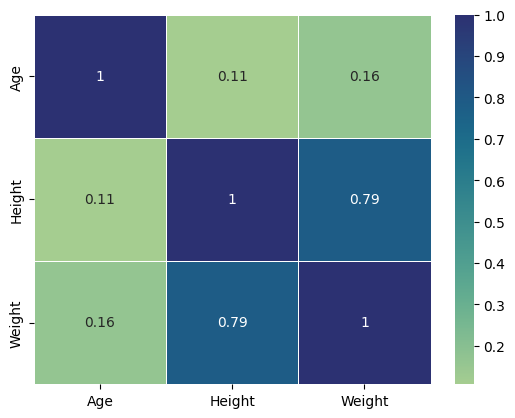

In [28]:
#Heat map of the correlation between 'Age', 'Height' and 'Weight'
sns.heatmap(data[['Age','Height','Weight']].corr(), annot=True, cmap='crest',linewidths=0.5)

### There is a positive correlation between 'Height' and 'Weight' as we could expect, but not between 'Age' and the rest of the variables.

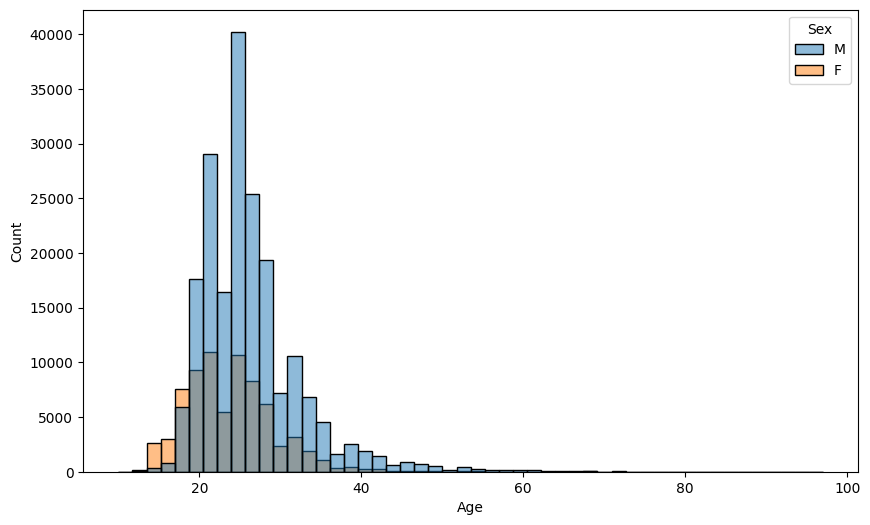

In [29]:
#Histogram of the 'Age' distribution by 'Sex'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Sex', bins=50)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

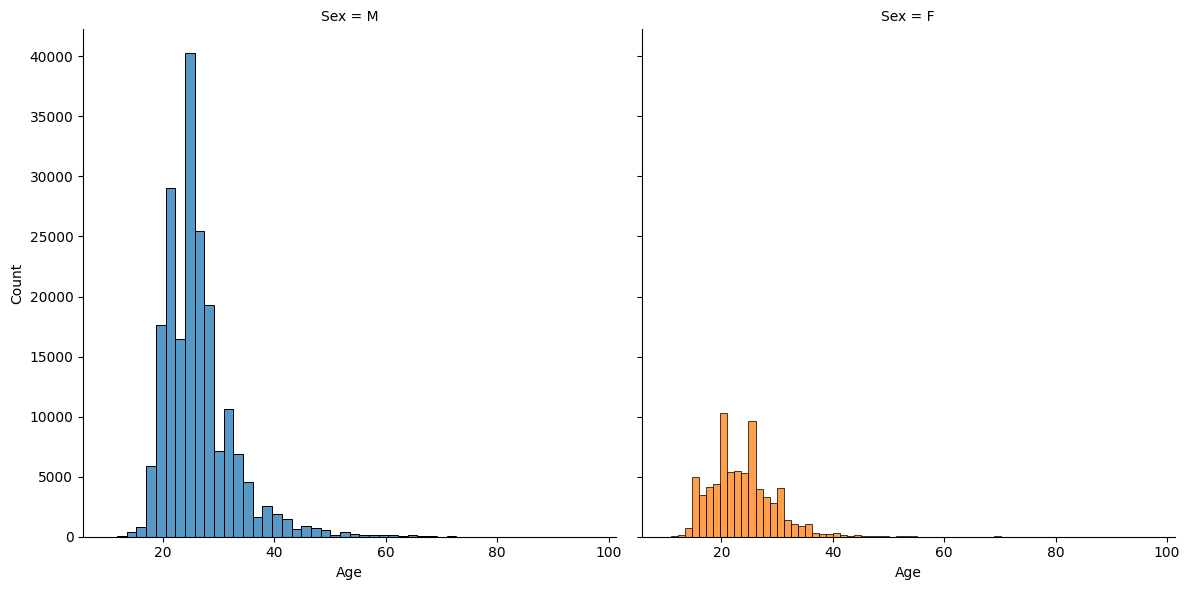

In [30]:
#Separate the previous histogram into two by gender
plt.figure(figsize=(10, 6))  
g = sns.FacetGrid(data, col="Sex", height=6, aspect=1.0, hue='Sex')
g.map(sns.histplot, "Age", bins=50)
plt.show()

### As we can see, women participate in the Olympic Games at a younger age, but men have older athletes.
### This age distribution can be explained by the fact that women reach biological maturity earlier than men, which allows them to participate earlier in the Olympic Games.
### Regarding the longevity of men, it could be explained by the fact that they historically have fewer family responsibilities that make it impossible for them to continue practicing sports.

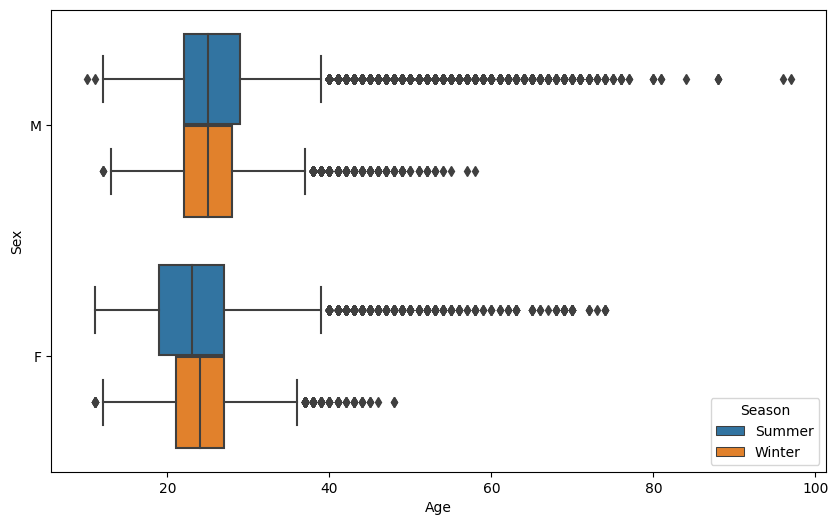

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex', hue='Season')
plt.show()

### A determining factor for the longevity of athletes is the climate, since as seen in the box plot, older athletes for both sexes participate in the Summer Olympics.

# Answers to questions 4:
### 4. Evolution of the number of sports by edition.
#### As we can see in the line plot the number of sports in the Olympic Games has been increasing almost in every edition, only in the Winter Olympic Games has been more constant.

In [32]:
#Evolution of the number of 'Sports' throughout the Olyumpic Games editions
sport_number_evolution = data.groupby(['Games','Year','Season'])[['Sport', 'Event']].nunique()

/tmp/ipykernel_20/741778350.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


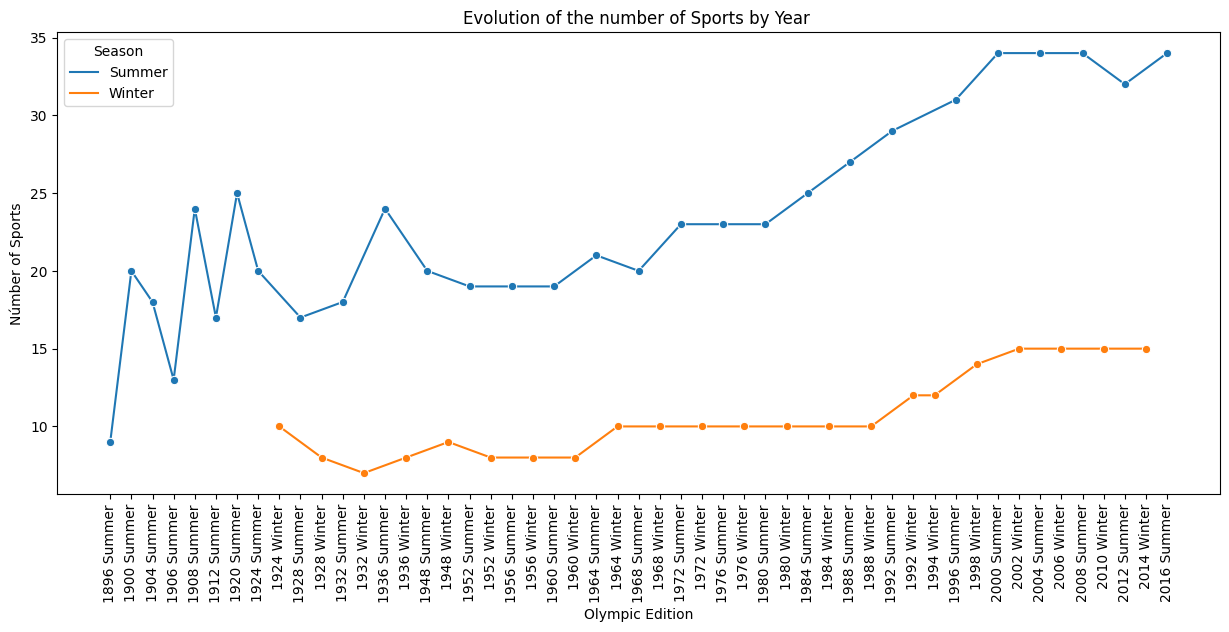

In [33]:
#Lineplot of the evolution of the number of 'Sports' throughout history
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=sport_number_evolution, x="Games", y="Sport", hue='Season', marker="o")
plt.xlabel("Olympic Edition")
plt.ylabel("Númber of Sports")
plt.title("Evolution of the number of Sports by Year ")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Answers to questions 5:
### 5. Number of Olympic Games by city
#### The answer to this question is divided into two bar graphs, one for the Summer Olympics and one for the Winter Olympics.
#### All the cities that have hosted this sports event and how many times they have done so are displayed. At first glance, we can see that European cities predominate, which could be explained because it was on this continent where the ancient sports tradition was revived and first promoted.

In [34]:
#Select only the summer olympic games data
summer_games_rows = data[data['Season'] == 'Summer']

#Select only the summer olympic games data
winter_games_rows = data[data['Season'] == 'Winter']

#Grouping the summer 'Games' data by 'City' and 'Sex' and counting the unique values 
summer_games = summer_games_rows.groupby(['City'])[['Games']].nunique()
summer_games = summer_games.sort_values(by='Games', ascending=False)

#Grouping the summer 'Games' data by 'City' and 'Sex' and counting the unique values 
winter_games = winter_games_rows.groupby(['City'])[['Games']].nunique()
winter_games = winter_games.sort_values(by='Games', ascending=False)


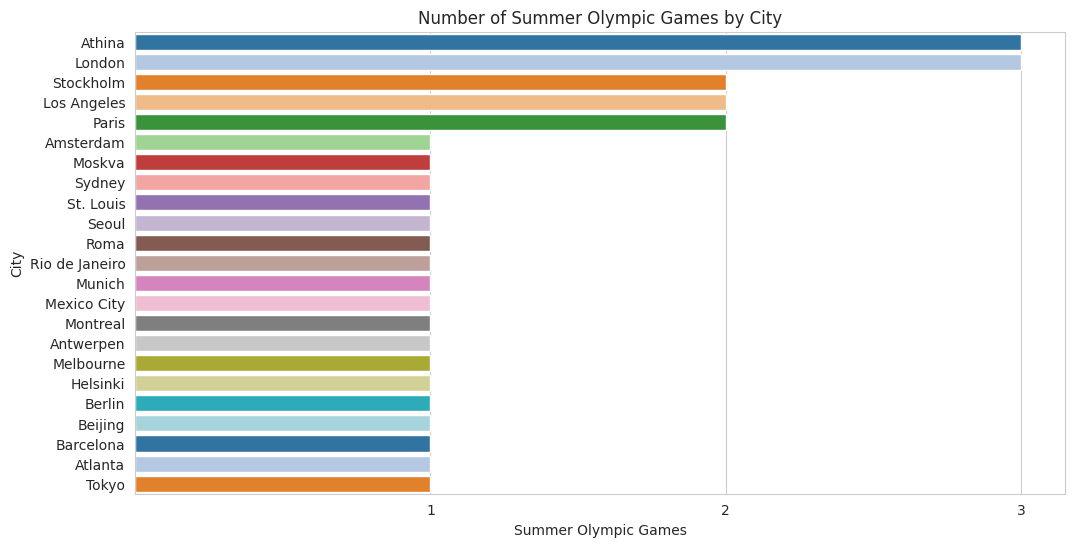

In [35]:
#Show the number of Summer 'Games' by 'City'
sns.set_style("whitegrid")
summer_games.reset_index(inplace=True)

plt.figure(figsize=(12, 6))  
sns.barplot(data=summer_games, x='Games', y='City', palette='tab20')

plt.xlabel('Summer Olympic Games')
plt.ylabel('City')
plt.title('Number of Summer Olympic Games by City')
plt.xticks([1,2,3]) 

plt.show()

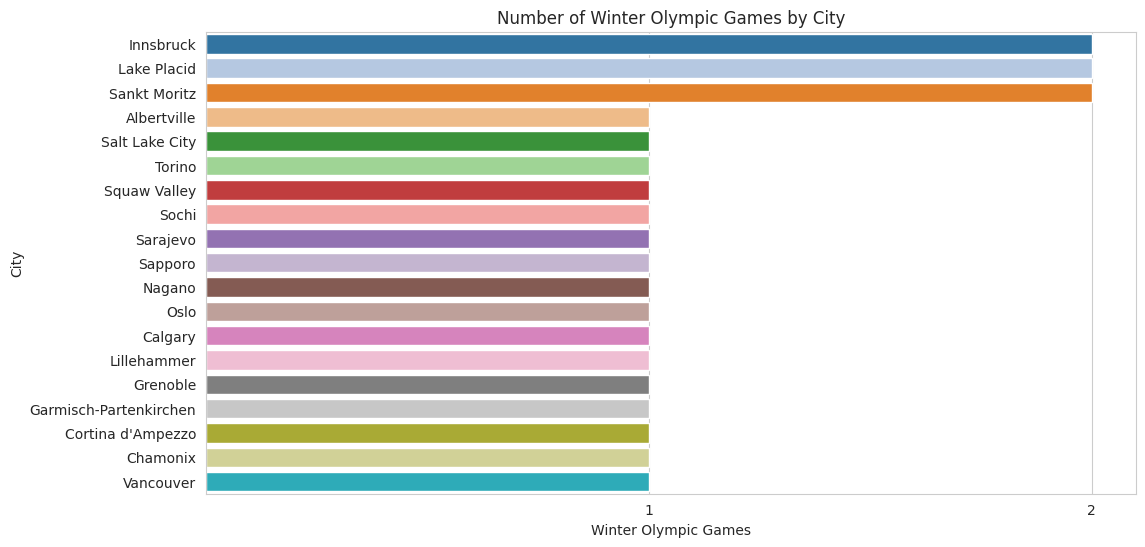

In [36]:
#Show the number of Winter 'Games' by 'City'
sns.set_style("whitegrid")
winter_games.reset_index(inplace=True)

plt.figure(figsize=(12, 6))  
sns.barplot(data=winter_games, x='Games', y='City', palette='tab20')

plt.xlabel('Winter Olympic Games')
plt.ylabel('City')
plt.title('Number of Winter Olympic Games by City')
plt.xticks([1, 2]) 


plt.show()